In [3]:
import nltk
from nltk import word_tokenize
from collections import Counter

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/mn/nltk_data...


True

In [20]:
sample_text = 'the world is beautiful as we accept different opinions! #Arguments exist, #thoughts as well. Say hi to the world :-). Acceptance \
doesn need approval. Approved arguement, or argument approval? '

# calculate the frequency of words
print('word frequency:\n', Counter(word_tokenize(sample_text)))

print('\nThe most frequent words:\n', Counter(word_tokenize(sample_text)).most_common(3))

word frequency:
 Counter({'.': 3, 'the': 2, 'world': 2, 'as': 2, '#': 2, ',': 2, 'approval': 2, 'is': 1, 'beautiful': 1, 'we': 1, 'accept': 1, 'different': 1, 'opinions': 1, '!': 1, 'Arguments': 1, 'exist': 1, 'thoughts': 1, 'well': 1, 'Say': 1, 'hi': 1, 'to': 1, ':': 1, '-': 1, ')': 1, 'Acceptance': 1, 'doesn': 1, 'need': 1, 'Approved': 1, 'arguement': 1, 'or': 1, 'argument': 1, '?': 1})

The most frequent words:
 [('.', 3), ('the', 2), ('world', 2)]


## Text preprocessing
Here I would like to remove stop words and unknown characters to make sure to capture real words

In [21]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tokens = [ word for word in word_tokenize(sample_text.lower())
                      if word.isalpha()]

words = [word for word in tokens if word not in stopwords.words('english')]

lem = WordNetLemmatizer()

lems = [lem.lemmatize(t) for t in words]

Counter(lems).most_common(3)

[('world', 2), ('argument', 2), ('approval', 2)]

## Gensim
It is a free resource in NLP and it is used in topic identification, build word vectors and create documents. 

In [25]:
sample_text_lst =['The COVID-19 pandemic exposed the feeble state of Japan’s vaccine research and development capabilities.',
                  'Only now, for example, are Japanese regulators considering approval of the country’s first homegrown COVID-19 vaccines,',
                  'months after many less advanced nations developed their own shots.',
                  'Determined to catch up, Japan is ramping up a 1.1 trillion yen ($8.5 billion) initiative that aims to give Japan the capability to develop a vaccine for a new virus in 100 days,',
                  'a goal being adopted by many countries.']

In [30]:
import gensim
from gensim.corpora.dictionary import Dictionary

tokenized = [word_tokenize(lst.lower()) for lst in sample_text_lst]
dic = Dictionary(tokenized)
print(dic.token2id)

{'.': 0, 'and': 1, 'capabilities': 2, 'covid-19': 3, 'development': 4, 'exposed': 5, 'feeble': 6, 'japan': 7, 'of': 8, 'pandemic': 9, 'research': 10, 's': 11, 'state': 12, 'the': 13, 'vaccine': 14, '’': 15, ',': 16, 'approval': 17, 'are': 18, 'considering': 19, 'country': 20, 'example': 21, 'first': 22, 'for': 23, 'homegrown': 24, 'japanese': 25, 'now': 26, 'only': 27, 'regulators': 28, 'vaccines': 29, 'advanced': 30, 'after': 31, 'developed': 32, 'less': 33, 'many': 34, 'months': 35, 'nations': 36, 'own': 37, 'shots': 38, 'their': 39, '$': 40, '(': 41, ')': 42, '1.1': 43, '100': 44, '8.5': 45, 'a': 46, 'aims': 47, 'billion': 48, 'capability': 49, 'catch': 50, 'days': 51, 'determined': 52, 'develop': 53, 'give': 54, 'in': 55, 'initiative': 56, 'is': 57, 'new': 58, 'ramping': 59, 'that': 60, 'to': 61, 'trillion': 62, 'up': 63, 'virus': 64, 'yen': 65, 'adopted': 66, 'being': 67, 'by': 68, 'countries': 69, 'goal': 70}


### gensim corpus
gensim uses tokenid and the frequency of each tokens to create a list of list, which each list is a list in the **sample_text_lst**.
For example the first list corresponds to 'The COVID-19 pandemic ...'. 
The first number is the token id in the **dic** and the second one is the frequency of the token in each sublist. 

In [32]:
corpus = [dic.doc2bow(doc) for doc in tokenized]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1)], [(3, 1), (8, 1), (11, 1), (13, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(0, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(7, 2), (13, 1), (14, 1), (16, 2), (23, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 3), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 2), (64, 1), (65, 1)], [(0, 1), (34, 1), (46, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)]]


In [38]:
# looking at the first ten words in the first list of corpus
for word_id, word_count in corpus[0][:10]:
    print(dic.get(word_id), word_count)

. 1
and 1
capabilities 1
covid-19 1
development 1
exposed 1
feeble 1
japan 1
of 1
pandemic 1


In [45]:
# calculate the frequency of each word in whole document using the created corpus

import itertools
from collections import defaultdict

word_counts = defaultdict(int)

for word_id, word_count in itertools.chain.from_iterable(corpus):
    word_counts[word_id] += word_count

In [46]:
print(word_counts)

defaultdict(<class 'int'>, {0: 3, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 3, 8: 2, 9: 1, 10: 1, 11: 2, 12: 1, 13: 4, 14: 2, 15: 2, 16: 5, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 2, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 4, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 3, 62: 1, 63: 2, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1})


In [50]:
sorted_word_counts = sorted(word_counts.items(), key=lambda w: w[1], reverse=True) 
print(sorted_word_counts)

[(16, 5), (13, 4), (46, 4), (0, 3), (7, 3), (61, 3), (3, 2), (8, 2), (11, 2), (14, 2), (15, 2), (23, 2), (34, 2), (63, 2), (1, 1), (2, 1), (4, 1), (5, 1), (6, 1), (9, 1), (10, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (62, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)]


In [53]:
for word_id, word_count in sorted_word_counts[:10]:
    print(dic.get(word_id), word_count)

, 5
the 4
a 4
. 3
japan 3
to 3
covid-19 2
of 2
s 2
vaccine 2


### TF-IDF
This stands for term frequency-inverse document frequency

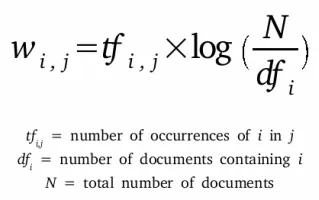

The term frequency can explained by the example below:
suppose the word: $'World'$ appears 10 times in a document which has 200 words. If a corpus has 1000 documents which 50 of them has the word then term frequency is:

(10/200)*log(1000/50)

In [78]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)
tfidf_weights = tfidf[corpus[1]]
print(tfidf_weights)
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

[(3, 0.13957298366385287), (8, 0.13957298366385287), (11, 0.13957298366385287), (13, 0.0778109544938191), (15, 0.13957298366385287), (16, 0.4187189509915586), (17, 0.24515586990680352), (18, 0.24515586990680352), (19, 0.24515586990680352), (20, 0.24515586990680352), (21, 0.24515586990680352), (22, 0.24515586990680352), (23, 0.13957298366385287), (24, 0.24515586990680352), (25, 0.24515586990680352), (26, 0.24515586990680352), (27, 0.24515586990680352), (28, 0.24515586990680352), (29, 0.24515586990680352)]


In [79]:
for word_id, weight in sorted_tfidf_weights:
    print(dic.get(word_id), weight)

, 0.4187189509915586
approval 0.24515586990680352
are 0.24515586990680352
considering 0.24515586990680352
country 0.24515586990680352
example 0.24515586990680352
first 0.24515586990680352
homegrown 0.24515586990680352
japanese 0.24515586990680352
now 0.24515586990680352
only 0.24515586990680352
regulators 0.24515586990680352
vaccines 0.24515586990680352
covid-19 0.13957298366385287
of 0.13957298366385287
s 0.13957298366385287
’ 0.13957298366385287
for 0.13957298366385287
the 0.0778109544938191
